## Mitochondria Segmentation with a simple U-Net

#### Imports

In [2]:
import model
from keras.utils import normalize
import os
import cv2
from skimage import io
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from private_path import train_image_path, train_mask_path, test_image_path, test_mask_path

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


#### Load and Preprocess Data

In [3]:
train_images = io.imread(train_image_path)
train_masks = io.imread(train_mask_path)
print(train_images.shape)
print(train_masks.shape)

(165, 768, 1024)
(165, 768, 1024)


In [4]:
# Data preprocessing 
SIZE = 256
# Reshape train images and convert to numpy array
train_images = [train_images[i] for i in range(len(train_images))]
X_train = []
for image in train_images:
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image = np.array(image)
        X_train.append(image)
# Reshape train masks and convert to numpy array
train_masks = [train_masks[i] for i in range(len(train_masks))]
y_train = []
for mask in train_masks:
        mask = Image.fromarray(mask)
        mask = mask.resize((SIZE, SIZE))
        mask = np.array(mask)
        y_train.append(mask)

# Normalize images and expand dims
X_train = np.expand_dims(normalize(np.array(X_train), axis=1), 3)/255
# Rescale masks from 0 to 1 and expand dims
y_train = np.expand_dims((np.array(y_train)),3) 

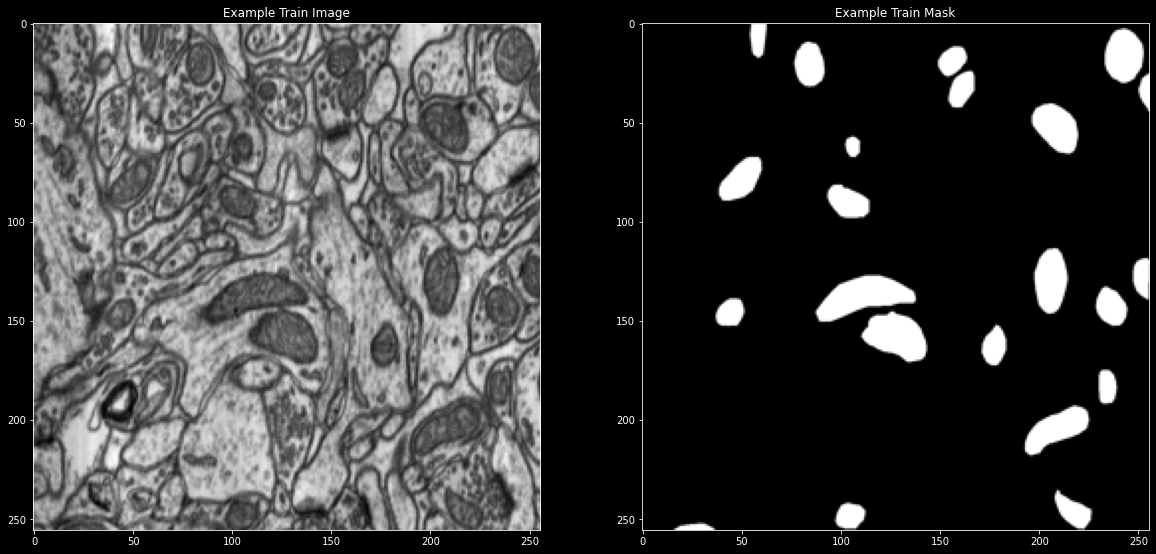

In [5]:
# Sanity check 
plt.figure(figsize=(20,15))
plt.axis('off')
plt.subplot(121)
plt.title('Example Train Image')
plt.imshow(X_train[0], cmap='gray')
plt.subplot(122)
plt.title('Example Train Mask')
plt.imshow(y_train[0], cmap='gray')

#### Load and Train Model